In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-stock-price-dataset/Starbucks Dataset.csv



Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/starbucks-stock-price-dataset/Starbucks Dataset.csv')

Exploring the dataset

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800


In [5]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2719,2003-04-10,6.347500,6.437500,6.315000,6.432500,4.991914,11266400
505,1994-06-27,0.851563,0.851563,0.820313,0.843750,0.654789,8435200
5901,2015-11-30,62.099998,62.290001,61.200001,61.389999,51.824322,9863800
4520,2010-06-07,13.125000,13.125000,12.755000,12.770000,9.951156,19664200
3049,2004-08-03,11.550000,11.680000,11.400000,11.462500,8.895427,17194800


# Step 2: Exploring the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8036 non-null   object 
 1   Open       8036 non-null   float64
 2   High       8036 non-null   float64
 3   Low        8036 non-null   float64
 4   Close      8036 non-null   float64
 5   Adj Close  8036 non-null   float64
 6   Volume     8036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.6+ KB


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8.036000e+03
mean,30.054280,30.351487,29.751322,30.058857,26.674025,1.470459e+07
std,33.615577,33.906613,33.314569,33.615911,31.728090,1.340021e+07
min,0.328125,0.347656,0.320313,0.335938,0.260703,1.504000e+06
25%,4.392031,4.531250,4.304922,4.399610,3.414300,7.817750e+06
50%,13.325000,13.493750,13.150000,13.330000,10.352452,1.169815e+07
75%,55.250000,55.722501,54.852499,55.267499,47.464829,1.778795e+07
max,126.080002,126.320000,124.809998,126.059998,118.010414,5.855088e+08


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
df.shape

(8036, 7)

# Step 3: Data Cleaning

In [12]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or you could fill them with appropriate values)
data = df.dropna()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Ensure that the date column is in datetime format.

In [13]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400
1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800
1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600
1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800
1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800


# Step 4: Data Visualization
    
Plot the closing prices over time to identify trends.

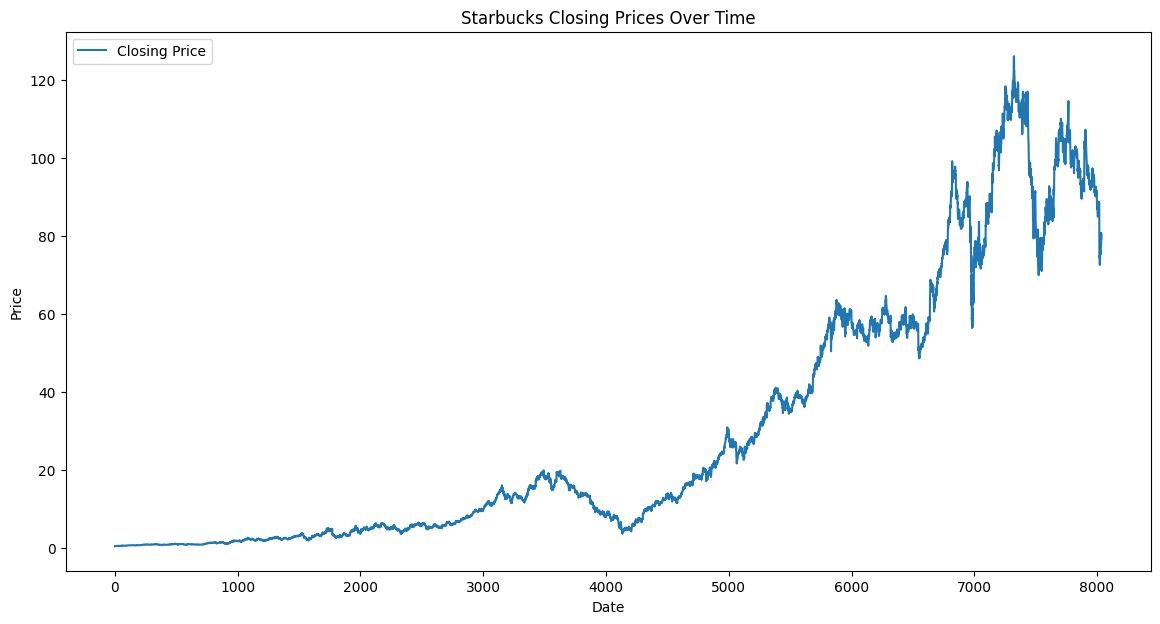

In [15]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title('Starbucks Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Step 5: Moving Averages

Calculate and plot moving averages.

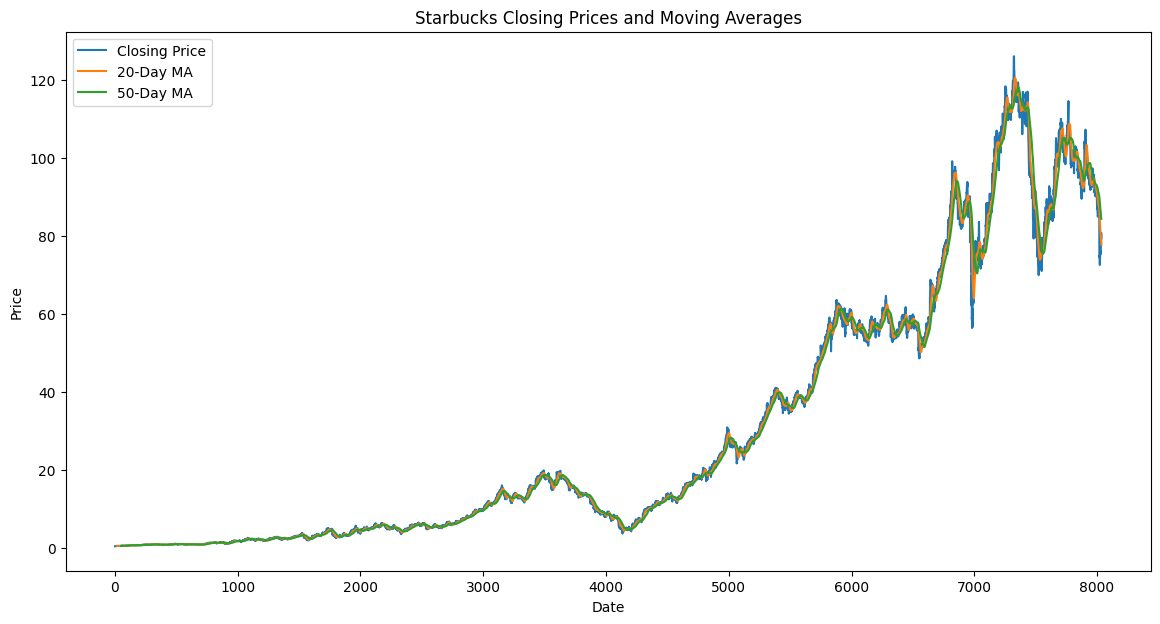

In [16]:
# Calculate moving averages
data['20_day_MA'] = data['Close'].rolling(window=20).mean()
data['50_day_MA'] = data['Close'].rolling(window=50).mean()

# Plot the closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['20_day_MA'], label='20-Day MA')
plt.plot(data['50_day_MA'], label='50-Day MA')
plt.title('Starbucks Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Step 6: Volatility Analysis

Calculate daily returns and volatility.

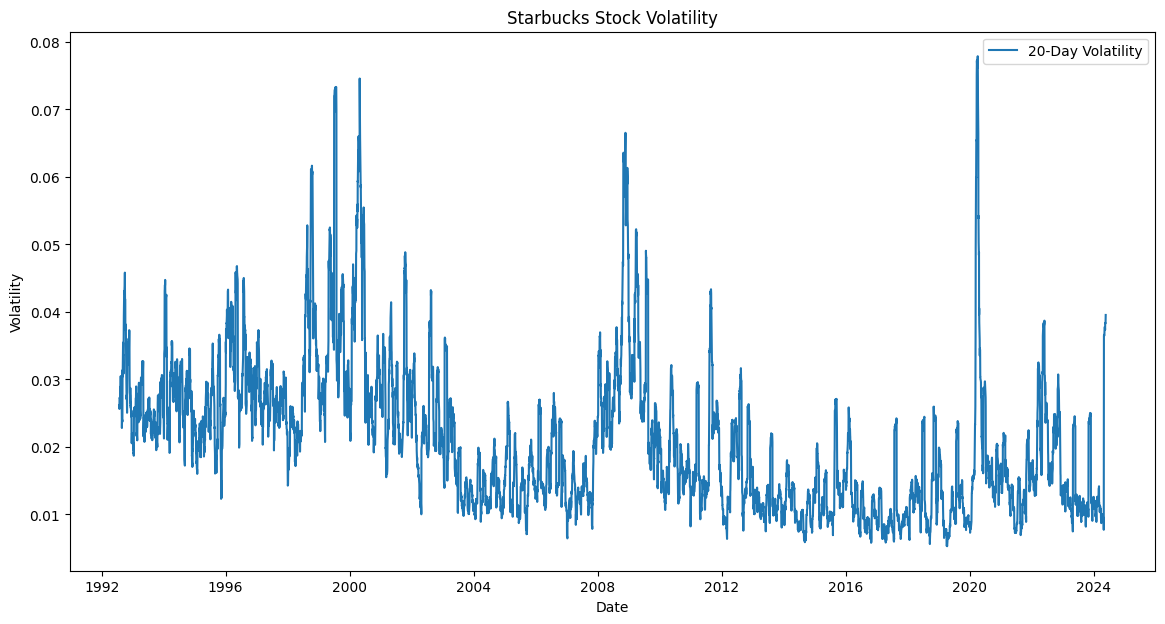

In [17]:
# Calculate daily returns
df['daily_return'] = df['Close'].pct_change()

# Calculate rolling volatility (standard deviation of returns)
df['volatility'] = df['daily_return'].rolling(window=20).std()

# Plot the volatility
plt.figure(figsize=(14, 7))
plt.plot(df['volatility'], label='20-Day Volatility')
plt.title('Starbucks Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


# Step 7: Correlation Analysis

Examine the correlation between trading volume and stock prices.

In [18]:
# Calculate the correlation matrix
correlation_matrix = data[['Close', 'Volume']].corr()

print(correlation_matrix)


           Close    Volume
Close   1.000000 -0.319534
Volume -0.319534  1.000000
